#Information

**This needs to be opened on Google Colab. Needs to use a TPU if you choose to run it**

Below shows the script and the outputs using the optimum model files on the Twitter and Facebook Dataset. I could not share the model files through QMPlus as the files were too large.

The scores for the Twitter and Facebook Data and for TL1 onto Youtube and Reddit are exactly the same as the ones shared in the report, as they were run using saved model files. However, the results on the Youtube and Reddit data using transfer learning method 2 vary slightly as they were run again, after I handed in the report **however the conclusions remain exactly the same in terms of best performing models etc.** 

**The Macro and Weighted F1 scores for TL2 are printed straight after the 10th fold of cross validation**

If you would like to run the script, it will run in about 3 hours: 

*   upload the two .tsv shared as additional material and it 
*   Uncomment the commands after each k-fold cross validation function which run the training on the Twitter and Facebook Data.

In that case, the results for the Twitter and Facebook Data and Transfer Learning 1 will vary slightly from the ones quoted in the report.



##TL1 = Transfer Learning Method 1
##TL2 = Transfer Learning Method 2

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.9 MB/s 
     |████████████████████████████████| 6.6 MB 78.2 MB/s 
     |████████████████████████████████| 596 kB 75.2 MB/s 
     |████████████████████████████████| 101 kB 11.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 19 kB/s 


In [ ]:
pip install flashtext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=053a29f60d504ad0cd7a0ad939c059bec27d66eb3ac1721bc0c827d38645e133
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext


In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=615d716fe8fb90ba6b68bdfea139bfcc816d622152dd9bec8aff4ba657f9834c
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [ ]:
pip install wordninja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 541 kB 5.0 MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541551 sha256=d940ec5eb38909f898fa1dabe0c34620c0997744f57d11829c123f8199806cbb
  Stored in directory: /root/.cache/pip/wheels/dd/3f/eb/a2692e3d2b9deb1487b09ba4967dd6920bd5032bfd9ff7acfc
Successfully built wordninja


In [ ]:
pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 321 kB 5.1 MB/s 
  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.36-py3-none-any.whl size=9236 sha256=bc1e0daa653a1ad7cb78dfb3910f1e2bf1907c4ccdd6cb969a87db5d54f1576c
  Stored in directory: /root/.cache/pip/wheels/ca/73/ed/41022b42c1d9ce60a8a2ebb71f042c7f895673760404d39fd7
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.43-py3-none-any.whl size=319231 sha256=8451cb244a8bd9af0eaf258b6481cf2e37adeae118fa9a57bc00eaaf0a35bd9e
  Stored in directory: /root/.cache/pip/wheels/71/d5/dd/d4893fffb9dcb9494de70478ab9728ae5d105f7d849a90e81a
  Created wheel for compress-json: filename=compress_json-1.0.7-py3-none-any.whl size=5233 sha256=61f5f5195505ebb8f3ad443a377a1daf2478bc8c1e4f2c8ab78395331d98ea8e
  Stored in directory: /root/.cache/pip/wheels/6d/7e/13/0e370d719528969d430498ca952417324595d116776840b279
Successful

In [ ]:
pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 4.9 MB/s 


In [ ]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 5.1 MB/s 
     |████████████████████████████████| 141 kB 78.3 MB/s 
     |████████████████████████████████| 115 kB 79.2 MB/s 
     |████████████████████████████████| 212 kB 78.9 MB/s 
     |████████████████████████████████| 127 kB 78.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import pickle
import csv
from transformers import BertTokenizer
import numpy as np
from emot.emo_unicode import UNICODE_EMOJI, UNICODE_EMOJI_ALIAS, EMOTICONS_EMO
from flashtext import KeywordProcessor
import re
import emoji
from sklearn import model_selection
import pandas as pd
import keras
from keras.layers import Lambda, GlobalAveragePooling1D, Dense, Embedding, Concatenate, Flatten
from keras import backend as K
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import LSTM, RNN, Dropout, Input, LeakyReLU, Bidirectional,Conv1D, GlobalMaxPooling1D
from keras.layers.core import Dense
from keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold , KFold ,RepeatedKFold, cross_val_score
import nlpaug
import nlpaug.augmenter.word as naw
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import random
import datasets as ds
from sklearn.metrics import f1_score
from transformers import TFDistilBertModel, DistilBertConfig, TFDistilBertForSequenceClassification
import tensorflow as tf

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Model Start

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
MAX_LEN = 200

In [ ]:
# Defining DistilBERT tokonizer
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME, add_special_tokens=True,
                                                max_length=MAX_LEN, pad_to_max_length=True)

def tokenize(sentences, tokenizer, pad_length=MAX_LEN, pad_to_max_length=True ):
    if type(sentences) == str:
        inputs = tokenizer.encode_plus(sentences, add_special_tokens=True, max_length=pad_length, pad_to_max_length=pad_to_max_length, 
                                             return_attention_mask=True, return_token_type_ids=True)
        return np.asarray(inputs['input_ids'], dtype='int32'), np.asarray(inputs['attention_mask'], dtype='int32'), np.asarray(inputs['token_type_ids'], dtype='int32')
    input_ids, input_masks, input_segments = [],[],[]
    for sentence in sentences:
        inputs = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=pad_length, pad_to_max_length=pad_to_max_length, 
                                             return_attention_mask=True, return_token_type_ids=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])    
        
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32'), np.asarray(input_segments, dtype='int32')


#Load HASOC 2019 Twitter and Facebook Data

In [ ]:
corpus = []
rawTrainingData = []
rawTestData = []
user_list = []

def import_data(path):
  tempTrainingData = []
  tempTestData = []
  

  with open(path, 'r') as csvfile:
    if path == '/content/english_dataset.tsv':
      lineReader = csv.reader(csvfile, delimiter= '\t', quotechar="\"")
      for row in lineReader:
        if len(row) == 5:
          user_list.extend(re.findall("[@]\w+", row[1]))
          tempTrainingData.append([row[0],row[1],row[2]])
      rawTrainingData.extend(tempTrainingData)    
    else:
      lineReader = csv.reader(csvfile, delimiter= '\t', quotechar="\"")
      for row in lineReader:
        user_list.extend(re.findall("[@]\w+", row[1]))
        tempTestData.append([row[0],row[1],row[2]])
      rawTestData.extend(tempTestData[1:])


import_data('/content/english_dataset.tsv')
import_data('/content/hasoc2019_en_test-2919.tsv')

##Organise Data

In [ ]:
# Now we can download and preprocess the data 
#print(rawTrainingData[0])

# I want to extract the text

textTrainingData = []
labeledTrainingData = []
trainLabels = []

for r in rawTrainingData:
    textTrainingData.extend([r[1]])
    labeledTrainingData.append([r[1], r[2]])
    trainLabels.append([r[2]])


textTestData = []
labeledTestData = []
testLabels = []

for r in rawTestData:
    textTestData.extend([r[1]])
    labeledTestData.append([r[1], r[2]])
    testLabels.append([r[2]])    
   

# Preprocessing

##Define Some functions for Function for Emoji


In [ ]:
# Here we can replace emojis with the descriptive keywords
all_emoticons = {**UNICODE_EMOJI, **UNICODE_EMOJI_ALIAS, **EMOTICONS_EMO}
all_emoticons = {k:v.replace(":","").replace("_"," ").strip() for k,v in all_emoticons.items()}
kp_all_emoticons = KeywordProcessor()
for k, v in all_emoticons.items():
    kp_all_emoticons.add_keyword(k, v)

In [ ]:
# Function to add a space around emojis, otherwise they were not picked up

def add_space_emoji(text):
    result = ''
    for char in text:
        if char in UNICODE_EMOJI:
            result += ' '
        result += char
        
    return result.strip()     
            

text = add_space_emoji('hello')            

##Define preprocessing function

In [ ]:
# preprocess the data

#Questions
# HOW TO DEAL WITH HASHTAGS

import re
import wordninja as wn

def preprocess(corpus):
    data = []   
    posts = [] 
    user_list = []
    
    emoticons = [':-)', ':)', '(:', '(-:', ':))', '((:', ':-D', ':D', 'X-D', 'XD', 'xD', 'xD', '<3', '</3', ':\*',
                 ';-)',
                 ';)', ';-D', ';D', '(;', '(-;', ':-(', ':(', '(:', '(-:', ':,(', ':\'(', ':"(', ':((', ':D', '=D',
                 '=)',
                 '(=', '=(', ')=', '=-O', 'O-=', ':o', 'o:', 'O:', 'O:', ':-o', 'o-:', ':P', ':p', ':S', ':s', ':@',
                 ':>',
                 ':<', '^_^', '^.^', '>.>', 'T_T', 'T-T', '-.-', '*.*', '~.~', ':*', ':-*', 'xP', 'XP', 'XP', 'Xp',
                 ':-|',
                 ':->', ':-<', '$_$', '8-)', ':-P', ':-p', '=P', '=p', ':*)', '*-*', 'B-)', 'O.o', 'X-(', ')-X']
    
    for cor in corpus:
      if cor[0] not in posts:
        # GENERAL  
        text = cor[0].lower() # remove uppercase items
        users = []
        if len(re.findall("[@]\w+", text)) != 0:
            users.extend(re.findall("[@]\w+", text))
            user_list.extend(re.findall("[@]\w+", text))
        for user in users:
            text = text.replace(user,'<user>') # now we replace users with User (65% racist tweets?)
        #text = text.replace('@', '<user>')
        urls = re.findall(r'(http[^\s]+)', text)    
        if len(urls) != 0:
            for url in urls:
                text = text.replace(url, "<url>") # now re replace URL with <url>
        numbers = re.findall('[0-9]+', text)
        for number in numbers:
            text = text.replace(number, "<number>")
        #text = add_space_emoji(text)
        text = kp_all_emoticons.replace_keywords(text) # replace emojis with descriptions
        text = text.replace('#', '<hashtag>')
        text = re.sub(r"([?.!,¿])", r" ", text)
        text = re.sub(r'[" "]+', " ", text)
        data.append([text,cor[1]])
        posts.append(cor[0])
        
        
        
    return data, user_list

Here we run the preprocessing funcitons and split the output into text and labels

In [ ]:
preprocessed_traindata, train_accounts = preprocess(labeledTrainingData)
preprocessed_testdata, test_accounts = preprocess(labeledTestData)



train_text = [p[0] for p in preprocessed_traindata]
train_labels = [p[1] for p in preprocessed_traindata]

#train_text, val_text, train_labels, val_labels = model_selection.train_test_split(X_train, y_train, random_state = 2018, test_size = 0.2, stratify = trainLabels)

test_text = [p[0] for p in preprocessed_testdata]
test_labels = [p[1] for p in preprocessed_testdata]



preTrainingData = list(zip(train_text, train_labels))  
#preValData = list(zip(val_text, val_labels))                                                                            
preTestData = list(zip(test_text, test_labels))

Here we augment the data - since it decreased the performance of the model we did not use it. We return the input (preprocessed_data)

In [ ]:
aug = naw.SynonymAug(aug_src='wordnet',aug_max=3)

def augment_data(preprocessed_data):

  augmented_data = []

  '''for d in preprocessed_data:
    augmented_data.append([d[0], d[1]])
    if d[1] != 'none':
       augmented_text = aug.augment(d[0], n= 2)
       for i in range(len(augmented_text)):
          augmented_data.append([augmented_text[i],d[1]])
  '''

  counter = 0 
  total_counter = 0

  for d in preprocessed_data:
    if d[1] == 'NOT':
       counter += 1
    if d[1] != 'NOT' or counter < 3000:
       augmented_data.append([d[0], d[1]])
    #  total_counter += 1
    #if total_counter == 20000:
      #break        

  
  
      

  return preprocessed_data

In [ ]:
augmented_data = augment_data(preTrainingData)

In [ ]:
len(augmented_data)

5829

#Study Data imbalances

##Training Data

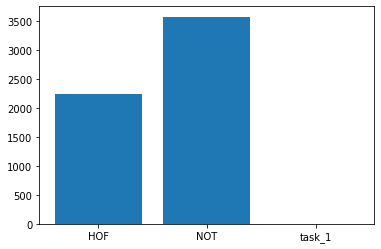

In [ ]:
# Structuring the training data

textTrainingData = []
trainingLabels = []

for obj in augmented_data:
  textTrainingData.append(obj[0])
  trainingLabels.append(obj[1])

keys, counts = np.unique(trainingLabels, return_counts = True)
plt.bar(keys, counts)
plt.show()

##Test Data

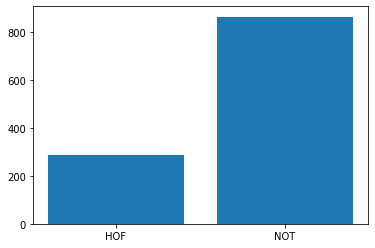

In [ ]:

# Structuring the validation data

textTestData = []
testLabels = []

for obj in preTestData:
  textTestData.append(obj[0])
  testLabels.append(obj[1])

keys, counts = np.unique(testLabels, return_counts = True)
plt.bar(keys, counts)
plt.show()  

##Edit the Labels to One Hot Vectors

Here we change the label to one-hot vectors.

In [ ]:

def label_2_int(dataset):
    y = []
    for example in dataset:
        if example[1] in ['NOT','2']:
            y.append([1,0])
        else:
            y.append([0,1])
    return y    

train_labels = label_2_int(augmented_data)
#val_labels = label_2_int(preValData)
test_labels = label_2_int(preTestData)

In [ ]:
print(len(train_labels))
print(len(test_labels))

5829
1153


In [ ]:
def label_counter(label):
  counter = 0
  for t in label:
    if np.argmax(t) != 0:
      counter += 1
  return counter

In [ ]:

label_counter(train_labels)
#print(label_counter(val_labels))
print(label_counter(test_labels))


288


#Tokenization

In [ ]:
train_ids, train_masks, train_segment = tokenize(textTrainingData, tokenizer)
test_ids, test_masks, test_segment = tokenize(textTestData, tokenizer)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2329: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
train_df = pd.DataFrame(list(zip(train_ids, train_masks)), columns = ['input_ids', 'attention_masks'])
test_df = pd.DataFrame(list(zip(test_ids, test_masks)), columns = ['input_ids', 'attention_masks'])

In [ ]:
import torch
import torch.nn as nn

# for train set
train_seq = np.array(train_df['input_ids'].tolist())
train_mask = np.array(train_df['attention_masks'].tolist())
train_y = np.array(train_labels)


# for test set
test_seq = np.array(test_df['input_ids'].tolist())
test_mask = np.array(test_df['attention_masks'].tolist())
test_y = np.array(test_labels)

In [ ]:
print(label_counter(train_y))

2251


#Load the Youtube and Reddit ETHOS Data

In [ ]:
ethos = ds.load_dataset('ethos','binary', split = 'train')

ethos_data = []
ethos_labels = []
ethos_text = []


for i in range(len(ethos['label'])):
  ethos_data.append([ethos['text'][i], ethos['label'][i]])
  ethos_labels.append([ethos['label'][i]])
  ethos_text.append([ethos['text'][i]])

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/998 [00:00<?, ? examples/s]

Dataset ethos downloaded and prepared to /root/.cache/huggingface/datasets/ethos/binary/1.0.0/898d3d005459ee3ff80dbeec2f169c6b7ea13de31a08458193e27dec3dd9ae38. Subsequent calls will reuse this data.


##Convert the ETHOS Labels to One Hot Vectors

In [ ]:
def ethos_label2int(data):
  ethos_labels = []
  for d in data:
    if d[1] == 0:
      ethos_labels.append([1,0])
    else:
      ethos_labels.append([0,1])

  return ethos_labels

ethosLabels = ethos_label2int(ethos_data)

##Tokenize ETHOS Data

In [ ]:
def bert_token_preparation_ethos(textData, yData):

  ethos_list = []

  for sentence in ethos_text:
    for sen in sentence:
      ethos_list.append(sen)
  
  ids, masks, segment = tokenize(ethos_list, tokenizer)
  
  seq = np.array(ids)
  mask = np.array(masks)
  ydata = np.array(yData)

  return seq, mask, ydata

seq_ethos, mask_ethos, y_ethos = bert_token_preparation_ethos(ethos_text,ethosLabels)  

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2329: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
ethos_df = pd.DataFrame(list(zip(seq_ethos, mask_ethos)), columns = ['input_ids', 'input_masks'])

In [ ]:
def model_inputs(x,y):
  input_ids = np.array(x['input_ids'].tolist())
  input_masks = np.array(x['input_masks'].tolist())
  y = np.array(y)
  return input_ids, input_masks, y

all_ids_be, all_mask_be, all_y_be = model_inputs(ethos_df, ethosLabels)

Function to evaluate performance

In [ ]:
from sklearn.metrics import make_scorer
def performance_eval(truth, predictions):
    tp, tn, fn, fp = 0.0,0.0,0.0,0.0
    for l,m in enumerate(truth):        
        if m==predictions[l] and m==1:
            tp+=1
        if m==predictions[l] and m==0:
            tn+=1
        if m!=predictions[l] and m==1:
            fn+=1
        if m!=predictions[l] and m==0:
            fp+=1
            #precision, recall, specificity, f1 score: 
    return tp, tn, fp, fn

#Model Starts

##Model 1

In [ ]:
# your code goes here


def BERTSTATIC():
      transformer_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', config = DistilBertConfig(num_labels = 2))
      transformer_model.layers[0].trainable = False
      input_ids = tf.keras.layers.Input(shape=(MAX_LEN,), name='input_token', dtype='int32')
      input_masks_ids = tf.keras.layers.Input(shape=(MAX_LEN,), name='masked_token', dtype='int32')
      X = transformer_model(input_ids, input_masks_ids)
      model = tf.keras.Model(inputs=[input_ids, input_masks_ids], outputs = X)
      return model

use_tpu = True
if use_tpu:
      # Create distribution strategy
      tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
      tf.config.experimental_connect_to_cluster(tpu)
      tf.tpu.experimental.initialize_tpu_system(tpu)
      strategy = tf.distribute.experimental.TPUStrategy(tpu)

    # Create model
      with strategy.scope():
        bertstatic = BERTSTATIC() 
        optimizer = tf.keras.optimizers.Adam(lr=2e-5)
        bertstatic.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


print(bertstatic.summary())


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token (InputLayer)       [(None, 200)]        0           []                               
                                                                                                  
 masked_token (InputLayer)      [(None, 200)]        0           []                               
                                                                                                  
 tf_distil_bert_for_sequence_cl  TFSequenceClassifie  66955010   ['input_token[0][0]',            
 assification (TFDistilBertForS  rOutput(loss=None,               'masked_token[0][0]']           
 equenceClassification)         logits=(None, 2),                                                 
                                 hidden_states=None                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


This is the training function for the bert models with dynamic and static embeddings. To change between them, you must change the is_frozen_embeddings tag in the function parameters in `baseline_kfold()`

In [ ]:
def static_kfold(train_seq, train_mask, train_y, is_ethos = False, is_frozen_embeddings = True):
  acc_per_fold = []
  loss_per_fold = []
  weighted_f1_list = []
  macro_f1_list = []
  
  if is_frozen_embeddings:
    epochs = 10
  elif is_ethos:
    epochs = 5
    n_split = 5
  else:
    epochs = 3  

  if is_frozen_embeddings:
    learning_rate = 0.001
  else:
    learning_rate = 2e-5  

  n_split = 10
  kfold = StratifiedKFold(n_splits = n_split, shuffle = True, random_state = 42)

  fold_no = 1

  for train_idx, val_idx in kfold.split(np.zeros(len(train_y)),[np.argmax(i) for i in train_y]):
    train_temp_seq = np.array([train_seq[i] for i in train_idx])
    train_temp_mask = np.array([train_mask[i] for i in train_idx])
    training_y = np.array([train_y[i] for i in train_idx])
   
    val_temp_seq = np.array([train_seq[i] for i in val_idx])
    val_temp_mask = np.array([train_mask[i] for i in val_idx])
    validation_y = np.array([train_y[i] for i in val_idx])


  # Create model
    with strategy.scope():
        new_model = BERTSTATIC() #Change to new_model = BERTBASELINE() for Model 2
        new_model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])	

    checkpoint = tf.keras.callbacks.ModelCheckpoint('checkpoint_'+str(fold_no)+'.h5', monitor= 'val_loss', 
                                                 verbose = 0, save_best_only = True, mode = 'min')	

  			

    #new_model.compile(optimizer=tf.keras.optimizers.Adam(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
  
    print(checkpoint)

    new_model.fit([train_temp_seq, train_temp_mask],training_y,
                    epochs= epochs,
                    batch_size= 32,
                    callbacks = [checkpoint],
                    validation_data=([val_temp_seq, val_temp_mask],validation_y),
                    verbose=1)
  



    new_model.load_weights('checkpoint_'+str(fold_no)+'.h5')
  
    scores = new_model.evaluate([val_temp_seq, val_temp_mask], validation_y, verbose = 1)
    predictions = new_model.predict([val_temp_seq, val_temp_mask])
       
  
    print(f'Score for fold {fold_no}: {new_model.metrics_names[0]} of {scores[0]}; {new_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100) 
    loss_per_fold.append(scores[0])
    #for i in range(len(predictions)):
    #  if np.argmax(predictions[i]) != validation_y[i]:
    #    print('Prediction: ', predictions[i], 'Actual: ', validation_y[i])

    weighted_f1 = f1_score(np.argmax(validation_y, axis = 1), np.argmax(predictions['logits'], axis = 1), average = 'weighted')
    macro_f1 = f1_score(np.argmax(validation_y, axis = 1), np.argmax(predictions['logits'], axis = 1), average = 'macro')
    
    weighted_f1_list.append(weighted_f1)
    macro_f1_list.append(macro_f1)

    fold_no += 1

  max_i = np.argmax(acc_per_fold)+1

  bertstatic.load_weights('checkpoint_'+str(max_i)+'.h5')

  f1_w = sum(weighted_f1_list)/len(weighted_f1_list)
  f1_m = sum(macro_f1_list)/len(macro_f1_list)

  print('Weighted F1 Score: {}, Macro F1 Score: {}'.format(f1_w, f1_m))

  return bertstatic



  

In [ ]:
#static_kfold(train_seq, train_mask, train_y, is_frozen_embeddings = True)

Load the weights of the optimum model here for either static or dynamic embeddings. (Due to file size, I could not upload the optimum models shown in the report)

In [ ]:
bertstatic.load_weights('checkpoint_static_MAX.h5')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def model_eval_bertbase(model,x,y):
  soft_predictions = model.predict(x)
  eval = model.evaluate(x,y)
  if model == bertstatic or model == bertbaseline:
    predictions = np.argmax(soft_predictions['logits'], axis = 1)
  else:
    predictions = np.argmax(soft_predictions, axis = 1)
  y_true = np.argmax(y, axis = 1)
  print(classification_report(y_true, predictions))
  cf_matrix = confusion_matrix(y_true, predictions)
  print(cf_matrix)
  print(sns.heatmap(cf_matrix, annot=True))
  precision = round(cf_matrix[1][1]/(cf_matrix[0][1]+cf_matrix[1][1]),4)
  recall = round(cf_matrix[1][1]/sum(cf_matrix[1]),4)
  specificity = round(cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[0][1]),4)
  print('Precision: {}, Recall: {}, Specificity: {}'.format(precision, recall, specificity))



##Model 1 Results on Twitter and Facebook

37/37 [==============================] - 13s 109ms/step - loss: 0.4741 - accuracy: 0.7936
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       865
           1       0.60      0.53      0.56       288

    accuracy                           0.79      1153
   macro avg       0.72      0.70      0.71      1153
weighted avg       0.79      0.79      0.79      1153

[[763 102]
 [136 152]]
AxesSubplot(0.125,0.125;0.62x0.755)
Precision: 0.5984, Recall: 0.5278, Specificity: 0.8821


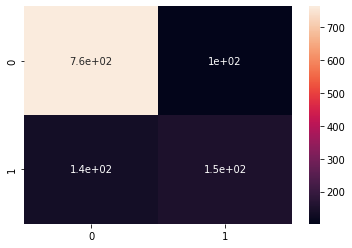

In [ ]:
model_eval_bertbase(bertstatic,[test_seq, test_mask], test_y)

The following function allows you to highlight the errors in the report

In [ ]:
def error_report(model, x, y, is_baseline = False):
  soft_pred = model.predict(x)
  eval = model.evaluate(x,y)
  if is_baseline == True:
    pred = np.argmax(soft_pred['logits'], axis = 1)
  else:
    pred = np.argmax(soft_pred, axis = 1)
  y_true = np.argmax(y, axis = 1)  
  for i in range(len(pred)):
    if pred[i] != y_true[i] and pred[i] == 0:
      print("Tweet: {}, Prediction: {}, Actual Label: {}".format(textTestData[i], pred[i], y_true[i]))



##We can now test the model on ETHOS using TL1 (Without further training)

32/32 [==============================] - 1s 23ms/step - loss: 0.7156 - accuracy: 0.6693
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       565
           1       0.63      0.59      0.61       433

    accuracy                           0.67       998
   macro avg       0.66      0.66      0.66       998
weighted avg       0.67      0.67      0.67       998

[[412 153]
 [177 256]]
AxesSubplot(0.125,0.125;0.62x0.755)
Precision: 0.6259, Recall: 0.5912, Specificity: 0.7292


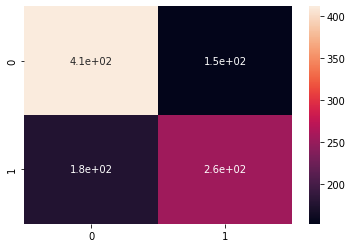

In [ ]:
model_eval_bertbase(bertstatic, [all_ids_be, all_mask_be], all_y_be)

##We can now train and test the model on the ETHOS data (TL2)

Make sure is_frozen_embeddings is tagged correctly depending on whether you want to have static or dynamic embeddings

In [ ]:
static_kfold(all_ids_be, all_mask_be, all_y_be, is_ethos = True, is_frozen_embeddings = True)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_39', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
29/29 [==============================] - 31s 564ms/step - loss: 0.9543 - accuracy: 0.6269 - val_loss: 0.5970 - val_accuracy: 0.7200
Epoch 2/10
29/29 [==============================] - 2s 85ms/step - loss: 0.5692 - accuracy: 0.6938 - val_loss: 0.5422 - val_accuracy: 0.7300
Epoch 3/10
29/29 [==============================] - 2s 82ms/step - loss: 0.5463 - accuracy: 0.7305 - val_loss: 0.4744 - val_accuracy: 0.7500
Epoch 4/10
29/29 [==============================] - 1s 43ms/step - loss: 0.6015 - accuracy: 0.7094 - val_loss: 0.5234 - val_accuracy: 0.7600
Epoch 5/10
29/29 [==============================] - 1s 44ms/step - loss: 0.6204 - accuracy: 0.7272 - val_loss: 0.7489 - val_accuracy: 0.7300
Epoch 6/10
29/29 [==============================] - 1s 44ms/step - loss: 0.6871 - accuracy: 0.7283 - val_loss: 0.5826 - val_accuracy: 0.7200
Epoch 7/10
29/29 [==============================] - 1s 

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_59']
You should probably TRAIN this model on a down-stream task to be able to use i

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
29/29 [==============================] - 31s 577ms/step - loss: 6.5362 - accuracy: 0.5657 - val_loss: 6.7668 - val_accuracy: 0.5600
Epoch 2/10
29/29 [==============================] - 1s 44ms/step - loss: 6.6620 - accuracy: 0.5668 - val_loss: 6.7668 - val_accuracy: 0.5600
Epoch 3/10
29/29 [==============================] - 1s 44ms/step - loss: 6.6620 - accuracy: 0.5668 - val_loss: 6.7668 - val_accuracy: 0.5600
Epoch 4/10
29/29 [==============================] - 1s 43ms/step - loss: 6.6620 - accuracy: 0.5668 - val_loss: 6.7668 - val_accuracy: 0.5600
Epoch 5/10
29/29 [==============================] - 1s 44ms/step - loss: 6.6620 - accuracy: 0.5668 - val_loss: 6.7668 - val_accuracy: 0.5600
Epoch 6/10
29/29 [==============================] - 1s 44ms/step - loss: 6.6620 - accuracy: 0.5668 - val_loss: 6.7668 - val_accuracy: 0.5600
Epoch 7/10
29/29 [==============================] - 2s 

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_79', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/10
29/29 [==============================] - 31s 581ms/step - loss: 4.7534 - accuracy: 0.4332 - val_loss: 4.6008 - val_accuracy: 0.4400
Epoch 2/10
29/29 [==============================] - 2s 87ms/step - loss: 4.6658 - accuracy: 0.4332 - val_loss: 4.5970 - val_accuracy: 0.4500
Epoch 3/10
29/29 [==============================] - 2s 86ms/step - loss: 2.4436 - accuracy: 0.5479 - val_loss: 0.6325 - val_accuracy: 0.7600
Epoch 4/10
29/29 [==============================] - 1s 45ms/step - loss: 0.6017 - accuracy: 0.7149 - val_loss: 0.7201 - val_accuracy: 0.7500
Epoch 5/10
29/29 [==============================] - 2s 84ms/step - loss: 0.6213 - accuracy: 0.7149 - val_loss: 0.5754 - val_accuracy: 0.7700
Epoch 6/10
29/29 [==============================] - 2s 85ms/step - loss: 0.5646 - accuracy: 0.7428 - val_loss: 0.5575 - val_accuracy: 0.7600
Epoch 7/10
29/29 [==============================] - 1s 

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_99', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/10
29/29 [==============================] - 31s 580ms/step - loss: 3.5963 - accuracy: 0.5668 - val_loss: 3.6389 - val_accuracy: 0.5700
Epoch 2/10
29/29 [==============================] - 2s 87ms/step - loss: 3.6287 - accuracy: 0.5657 - val_loss: 3.5496 - val_accuracy: 0.5700
Epoch 3/10
29/29 [==============================] - 1s 45ms/step - loss: 3.6295 - accuracy: 0.5657 - val_loss: 3.5731 - val_accuracy: 0.5700
Epoch 4/10
29/29 [==============================] - 2s 87ms/step - loss: 3.2458 - accuracy: 0.5880 - val_loss: 3.1499 - val_accuracy: 0.6600
Epoch 5/10
29/29 [==============================] - 1s 45ms/step - loss: 3.8084 - accuracy: 0.5735 - val_loss: 3.6368 - val_accuracy: 0.5700
Epoch 6/10
29/29 [==============================] - 1s 45ms/step - loss: 3.6756 - accuracy: 0.5657 - val_loss: 3.6016 - val_accuracy: 0.5700
Epoch 7/10
29/29 [==============================] - 1s 

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_119']
You should probably TRAIN this model on a down-stream task to be able to use 

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/10
29/29 [==============================] - 33s 586ms/step - loss: 3.5907 - accuracy: 0.5523 - val_loss: 3.5973 - val_accuracy: 0.5700
Epoch 2/10
29/29 [==============================] - 1s 44ms/step - loss: 3.6929 - accuracy: 0.5657 - val_loss: 3.6386 - val_accuracy: 0.5700
Epoch 3/10
29/29 [==============================] - 1s 46ms/step - loss: 3.6329 - accuracy: 0.5657 - val_loss: 3.8906 - val_accuracy: 0.5700
Epoch 4/10
29/29 [==============================] - 3s 88ms/step - loss: 3.6365 - accuracy: 0.5657 - val_loss: 3.5442 - val_accuracy: 0.5700
Epoch 5/10
29/29 [==============================] - 2s 85ms/step - loss: 3.5929 - accuracy: 0.5657 - val_loss: 3.5428 - val_accuracy: 0.5700
Epoch 6/10
29/29 [==============================] - 1s 46ms/step - loss: 3.5833 - accuracy: 0.5657 - val_loss: 3.7730 - val_accuracy: 0.5700
Epoch 7/10
29/29 [==============================] - 3s 

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_139']
You should probably TRAIN this model on a down-stream task to be able to use 

------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/10
29/29 [==============================] - 33s 593ms/step - loss: 3.5718 - accuracy: 0.5646 - val_loss: 3.5812 - val_accuracy: 0.5700
Epoch 2/10
29/29 [==============================] - 3s 88ms/step - loss: 3.6273 - accuracy: 0.5657 - val_loss: 3.5496 - val_accuracy: 0.5700
Epoch 3/10
29/29 [==============================] - 1s 44ms/step - loss: 3.6141 - accuracy: 0.5657 - val_loss: 3.6150 - val_accuracy: 0.5700
Epoch 4/10
29/29 [==============================] - 1s 44ms/step - loss: 3.6285 - accuracy: 0.5657 - val_loss: 3.6506 - val_accuracy: 0.5700
Epoch 5/10
29/29 [==============================] - 1s 43ms/step - loss: 3.5933 - accuracy: 0.5657 - val_loss: 3.8035 - val_accuracy: 0.5700
Epoch 6/10
29/29 [==============================] - 1s 44ms/step - loss: 3.6307 - accuracy: 0.5657 - val_loss: 3.5529 - val_accuracy: 0.5700
Epoch 7/10
29/29 [==============================] - 1s 

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_159']
You should probably TRAIN this model on a down-stream task to be able to use 

------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/10
29/29 [==============================] - 32s 594ms/step - loss: 0.7382 - accuracy: 0.6425 - val_loss: 0.5794 - val_accuracy: 0.6600
Epoch 2/10
29/29 [==============================] - 1s 44ms/step - loss: 0.5525 - accuracy: 0.7316 - val_loss: 0.8355 - val_accuracy: 0.6500
Epoch 3/10
29/29 [==============================] - 3s 122ms/step - loss: 0.6922 - accuracy: 0.6615 - val_loss: 0.5506 - val_accuracy: 0.7300
Epoch 4/10
29/29 [==============================] - 1s 46ms/step - loss: 0.5768 - accuracy: 0.7138 - val_loss: 0.5685 - val_accuracy: 0.6900
Epoch 5/10
29/29 [==============================] - 2s 85ms/step - loss: 0.5165 - accuracy: 0.7517 - val_loss: 0.5055 - val_accuracy: 0.7500
Epoch 6/10
29/29 [==============================] - 1s 46ms/step - loss: 0.6122 - accuracy: 0.7405 - val_loss: 0.5480 - val_accuracy: 0.7100
Epoch 7/10
29/29 [==============================] - 1s

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_179']
You should probably TRAIN this model on a down-stream task to be able to use 

------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/10
29/29 [==============================] - 32s 589ms/step - loss: 0.9121 - accuracy: 0.6102 - val_loss: 0.6202 - val_accuracy: 0.6700
Epoch 2/10
29/29 [==============================] - 1s 44ms/step - loss: 0.6126 - accuracy: 0.6882 - val_loss: 0.6295 - val_accuracy: 0.7000
Epoch 3/10
29/29 [==============================] - 1s 45ms/step - loss: 0.5486 - accuracy: 0.7350 - val_loss: 1.0937 - val_accuracy: 0.6300
Epoch 4/10
29/29 [==============================] - 1s 45ms/step - loss: 0.7308 - accuracy: 0.6837 - val_loss: 0.7058 - val_accuracy: 0.6100
Epoch 5/10
29/29 [==============================] - 1s 45ms/step - loss: 0.5598 - accuracy: 0.7316 - val_loss: 0.6402 - val_accuracy: 0.7200
Epoch 6/10
29/29 [==============================] - 1s 44ms/step - loss: 0.5248 - accuracy: 0.7439 - val_loss: 1.0452 - val_accuracy: 0.6300
Epoch 7/10
29/29 [==============================] - 1s 

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_199']
You should probably TRAIN this model on a down-stream task to be able to use 

------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/10
29/29 [==============================] - 32s 591ms/step - loss: 1.2615 - accuracy: 0.5951 - val_loss: 0.6099 - val_accuracy: 0.6566
Epoch 2/10
29/29 [==============================] - 3s 88ms/step - loss: 0.6044 - accuracy: 0.6852 - val_loss: 0.5504 - val_accuracy: 0.7071
Epoch 3/10
29/29 [==============================] - 2s 83ms/step - loss: 0.5552 - accuracy: 0.7330 - val_loss: 0.5406 - val_accuracy: 0.6566
Epoch 4/10
29/29 [==============================] - 1s 47ms/step - loss: 0.5333 - accuracy: 0.7430 - val_loss: 0.6578 - val_accuracy: 0.7273
Epoch 5/10
29/29 [==============================] - 3s 109ms/step - loss: 0.5629 - accuracy: 0.7130 - val_loss: 0.5243 - val_accuracy: 0.7273
Epoch 6/10
29/29 [==============================] - 1s 45ms/step - loss: 0.5007 - accuracy: 0.7508 - val_loss: 0.5810 - val_accuracy: 0.7576
Epoch 7/10
29/29 [==============================] - 1s

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_219', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use 

------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/10
29/29 [==============================] - 33s 596ms/step - loss: 3.8862 - accuracy: 0.5662 - val_loss: 3.6545 - val_accuracy: 0.5657
Epoch 2/10
29/29 [==============================] - 1s 46ms/step - loss: 3.6451 - accuracy: 0.5662 - val_loss: 3.8333 - val_accuracy: 0.5657
Epoch 3/10
29/29 [==============================] - 2s 87ms/step - loss: 3.6431 - accuracy: 0.5662 - val_loss: 3.6197 - val_accuracy: 0.5657
Epoch 4/10
29/29 [==============================] - 1s 45ms/step - loss: 3.5994 - accuracy: 0.5662 - val_loss: 3.7115 - val_accuracy: 0.5657
Epoch 5/10
29/29 [==============================] - 1s 44ms/step - loss: 3.6305 - accuracy: 0.5662 - val_loss: 3.7285 - val_accuracy: 0.5657
Epoch 6/10
29/29 [==============================] - 1s 44ms/step - loss: 3.7624 - accuracy: 0.5662 - val_loss: 3.6207 - val_accuracy: 0.5657
Epoch 7/10
29/29 [==============================] - 2s

#Model 2

In [ ]:
# your code goes here


def BERTBASELINE():
      transformer_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', config = DistilBertConfig(num_labels = 2))
      input_ids = tf.keras.layers.Input(shape=(MAX_LEN,), name='input_token', dtype='int32')
      input_masks_ids = tf.keras.layers.Input(shape=(MAX_LEN,), name='masked_token', dtype='int32')
      X = transformer_model(input_ids, input_masks_ids)
      model = tf.keras.Model(inputs=[input_ids, input_masks_ids], outputs = X)
      return model

use_tpu = True
if use_tpu:
      # Create distribution strategy
      tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
      tf.config.experimental_connect_to_cluster(tpu)
      tf.tpu.experimental.initialize_tpu_system(tpu)
      strategy = tf.distribute.experimental.TPUStrategy(tpu)

    # Create model
      with strategy.scope():
        bertbaseline = BERTBASELINE() 
        optimizer = tf.keras.optimizers.Adam(lr=2e-5)
        bertbaseline.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


print(bertbaseline.summary())


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_239']
You should probably TRAIN this model on a down-stream task to be able to use 

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token (InputLayer)       [(None, 200)]        0           []                               
                                                                                                  
 masked_token (InputLayer)      [(None, 200)]        0           []                               
                                                                                                  
 tf_distil_bert_for_sequence_cl  TFSequenceClassifie  66955010   ['input_token[0][0]',            
 assification_11 (TFDistilBertF  rOutput(loss=None,               'masked_token[0][0]']           
 orSequenceClassification)      logits=(None, 2),                                                 
                                 hidden_states=None                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
def baseline_kfold(train_seq, train_mask, train_y, is_ethos = False, is_frozen_embeddings = True):
  acc_per_fold = []
  loss_per_fold = []
  weighted_f1_list = []
  macro_f1_list = []
  
  if is_frozen_embeddings:
    epochs = 10
  elif is_ethos:
    epochs = 5
    n_split = 5
  else:
    epochs = 3  

  if is_frozen_embeddings:
    learning_rate = 0.001
  else:
    learning_rate = 2e-5  

  n_split = 10
  kfold = StratifiedKFold(n_splits = n_split, shuffle = True, random_state = 42)

  fold_no = 1

  for train_idx, val_idx in kfold.split(np.zeros(len(train_y)),[np.argmax(i) for i in train_y]):
    train_temp_seq = np.array([train_seq[i] for i in train_idx])
    train_temp_mask = np.array([train_mask[i] for i in train_idx])
    training_y = np.array([train_y[i] for i in train_idx])
   
    val_temp_seq = np.array([train_seq[i] for i in val_idx])
    val_temp_mask = np.array([train_mask[i] for i in val_idx])
    validation_y = np.array([train_y[i] for i in val_idx])


  # Create model
    with strategy.scope():
        new_model = BERTBASELINE() 
        new_model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])	

    checkpoint = tf.keras.callbacks.ModelCheckpoint('checkpoint_'+str(fold_no)+'.h5', monitor= 'val_loss', 
                                                 verbose = 0, save_best_only = True, mode = 'min')	

  			

    #new_model.compile(optimizer=tf.keras.optimizers.Adam(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
  
    print(checkpoint)

    new_model.fit([train_temp_seq, train_temp_mask],training_y,
                    epochs= epochs,
                    batch_size= 32,
                    callbacks = [checkpoint],
                    validation_data=([val_temp_seq, val_temp_mask],validation_y),
                    verbose=1)
  



    new_model.load_weights('checkpoint_'+str(fold_no)+'.h5')
  
    scores = new_model.evaluate([val_temp_seq, val_temp_mask], validation_y, verbose = 1)
    predictions = new_model.predict([val_temp_seq, val_temp_mask])
       
  
    print(f'Score for fold {fold_no}: {new_model.metrics_names[0]} of {scores[0]}; {new_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100) 
    loss_per_fold.append(scores[0])
    #for i in range(len(predictions)):
    #  if np.argmax(predictions[i]) != validation_y[i]:
    #    print('Prediction: ', predictions[i], 'Actual: ', validation_y[i])

    weighted_f1 = f1_score(np.argmax(validation_y, axis = 1), np.argmax(predictions['logits'], axis = 1), average = 'weighted')
    macro_f1 = f1_score(np.argmax(validation_y, axis = 1), np.argmax(predictions['logits'], axis = 1), average = 'macro')
    
    weighted_f1_list.append(weighted_f1)
    macro_f1_list.append(macro_f1)

    fold_no += 1

  max_i = np.argmax(acc_per_fold)+1

  bertbaseline.load_weights('checkpoint_'+str(max_i)+'.h5')

  f1_w = sum(weighted_f1_list)/len(weighted_f1_list)
  f1_m = sum(macro_f1_list)/len(macro_f1_list)

  print('Weighted F1 Score: {}, Macro F1 Score: {}'.format(f1_w, f1_m))

  return bertbaseline



  

In [ ]:
bertbaseline.load_weights('checkpoint_bertbaseline_MAX.h5')

##Model 2 Results on Twitter and Facebook



37/37 [==============================] - 13s 117ms/step - loss: 0.4553 - accuracy: 0.8456
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       865
           1       0.78      0.53      0.63       288

    accuracy                           0.85      1153
   macro avg       0.82      0.74      0.77      1153
weighted avg       0.84      0.85      0.84      1153

[[821  44]
 [134 154]]
AxesSubplot(0.125,0.125;0.62x0.755)
Precision: 0.7778, Recall: 0.5347, Specificity: 0.9491


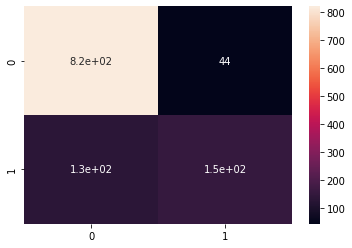

In [ ]:
model_eval_bertbase(bertbaseline,[test_seq, test_mask], test_y)

#Now test Model 2 with TL 1

32/32 [==============================] - 1s 23ms/step - loss: 0.7125 - accuracy: 0.6713
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       565
           1       0.65      0.51      0.58       433

    accuracy                           0.67       998
   macro avg       0.67      0.65      0.65       998
weighted avg       0.67      0.67      0.66       998

[[448 117]
 [211 222]]
AxesSubplot(0.125,0.125;0.62x0.755)
Precision: 0.6549, Recall: 0.5127, Specificity: 0.7929


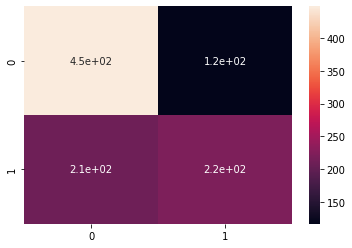

In [ ]:
model_eval_bertbase(bertbaseline, [all_ids_be, all_mask_be], all_y_be)

#Now Test Model 2 With TL2

In [ ]:
baseline_kfold(all_ids_be, all_mask_be, all_y_be, is_ethos = True, is_frozen_embeddings = False)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_259', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use 

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
29/29 [==============================] - 99s 2s/step - loss: 4.0731 - accuracy: 0.4354 - val_loss: 0.7121 - val_accuracy: 0.4400
Epoch 2/5
29/29 [==============================] - 5s 190ms/step - loss: 0.6717 - accuracy: 0.5969 - val_loss: 0.6464 - val_accuracy: 0.6100
Epoch 3/5
29/29 [==============================] - 5s 186ms/step - loss: 0.6209 - accuracy: 0.6849 - val_loss: 0.5796 - val_accuracy: 0.6900
Epoch 4/5
29/29 [==============================] - 2s 77ms/step - loss: 0.5213 - accuracy: 0.7595 - val_loss: 0.7352 - val_accuracy: 0.7400
Epoch 5/5
4/4 [==============================] - 1s 26ms/step - loss: 0.4968 - accuracy: 0.7600
Score for fold 1: loss of 0.49683675169944763; accuracy of 75.99999904632568%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_279']
You should probably TRAIN this model on a down-stream task to be able to use 

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
29/29 [==============================] - 100s 2s/step - loss: 0.9195 - accuracy: 0.5646 - val_loss: 0.6681 - val_accuracy: 0.6400
Epoch 2/5
29/29 [==============================] - 5s 187ms/step - loss: 0.5978 - accuracy: 0.6971 - val_loss: 0.5578 - val_accuracy: 0.7300
Epoch 3/5
29/29 [==============================] - 5s 188ms/step - loss: 0.4399 - accuracy: 0.8040 - val_loss: 0.5437 - val_accuracy: 0.7400
Epoch 4/5
29/29 [==============================] - 2s 77ms/step - loss: 0.2534 - accuracy: 0.8998 - val_loss: 1.0358 - val_accuracy: 0.7100
Epoch 5/5
4/4 [==============================] - 1s 27ms/step - loss: 0.5437 - accuracy: 0.7400
Score for fold 2: loss of 0.543716311454773; accuracy of 74.00000095367432%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_299']
You should probably TRAIN this model on a down-stream task to be able to use 

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
29/29 [==============================] - 101s 2s/step - loss: 0.9661 - accuracy: 0.5223 - val_loss: 0.6832 - val_accuracy: 0.6200
Epoch 2/5
29/29 [==============================] - 5s 183ms/step - loss: 0.6574 - accuracy: 0.6281 - val_loss: 0.6207 - val_accuracy: 0.7200
Epoch 3/5
29/29 [==============================] - 5s 191ms/step - loss: 0.5765 - accuracy: 0.7138 - val_loss: 0.5162 - val_accuracy: 0.7800
Epoch 4/5
29/29 [==============================] - 2s 76ms/step - loss: 0.4605 - accuracy: 0.8096 - val_loss: 1.5114 - val_accuracy: 0.6100
Epoch 5/5
4/4 [==============================] - 1s 26ms/step - loss: 0.5162 - accuracy: 0.7800
Score for fold 3: loss of 0.5161696672439575; accuracy of 77.99999713897705%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_319', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use 

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
29/29 [==============================] - 102s 2s/step - loss: 1.1156 - accuracy: 0.5078 - val_loss: 0.6746 - val_accuracy: 0.5700
Epoch 2/5
29/29 [==============================] - 6s 195ms/step - loss: 0.6751 - accuracy: 0.5880 - val_loss: 0.6379 - val_accuracy: 0.6400
Epoch 3/5
29/29 [==============================] - 6s 196ms/step - loss: 0.6253 - accuracy: 0.6759 - val_loss: 0.5566 - val_accuracy: 0.8100
Epoch 4/5
29/29 [==============================] - 5s 194ms/step - loss: 0.5649 - accuracy: 0.7439 - val_loss: 0.5505 - val_accuracy: 0.8000
Epoch 5/5
4/4 [==============================] - 1s 27ms/step - loss: 0.4873 - accuracy: 0.8000
Score for fold 4: loss of 0.48733317852020264; accuracy of 79.99999523162842%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_339']
You should probably TRAIN this model on a down-stream task to be able to use 

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
29/29 [==============================] - 102s 2s/step - loss: 1.0909 - accuracy: 0.5445 - val_loss: 0.6839 - val_accuracy: 0.6000
Epoch 2/5
29/29 [==============================] - 6s 204ms/step - loss: 0.6764 - accuracy: 0.5969 - val_loss: 0.6407 - val_accuracy: 0.6800
Epoch 3/5
29/29 [==============================] - 6s 210ms/step - loss: 0.6245 - accuracy: 0.6826 - val_loss: 0.5858 - val_accuracy: 0.7200
Epoch 4/5
29/29 [==============================] - 4s 144ms/step - loss: 0.5365 - accuracy: 0.7450 - val_loss: 0.6028 - val_accuracy: 0.7700
Epoch 5/5
4/4 [==============================] - 1s 26ms/step - loss: 0.5858 - accuracy: 0.7200
Score for fold 5: loss of 0.5857983231544495; accuracy of 71.99999690055847%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_359']
You should probably TRAIN this model on a down-stream task to be able to use 

------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
29/29 [==============================] - 103s 2s/step - loss: 1.0798 - accuracy: 0.6002 - val_loss: 0.6610 - val_accuracy: 0.6100
Epoch 2/5
29/29 [==============================] - 6s 210ms/step - loss: 0.6268 - accuracy: 0.6637 - val_loss: 0.5593 - val_accuracy: 0.7000
Epoch 3/5
29/29 [==============================] - 6s 211ms/step - loss: 0.5377 - accuracy: 0.7650 - val_loss: 0.4831 - val_accuracy: 0.7800
Epoch 4/5
29/29 [==============================] - 6s 212ms/step - loss: 0.4034 - accuracy: 0.8474 - val_loss: 0.4276 - val_accuracy: 0.7900
Epoch 5/5
4/4 [==============================] - 1s 26ms/step - loss: 0.4276 - accuracy: 0.7900
Score for fold 6: loss of 0.42759424448013306; accuracy of 78.99999618530273%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_379']
You should probably TRAIN this model on a down-stream task to be able to use 

------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/5
29/29 [==============================] - 105s 2s/step - loss: 3.4282 - accuracy: 0.4555 - val_loss: 0.6765 - val_accuracy: 0.5600
Epoch 2/5
29/29 [==============================] - 6s 211ms/step - loss: 0.6748 - accuracy: 0.5780 - val_loss: 0.6435 - val_accuracy: 0.6600
Epoch 3/5
29/29 [==============================] - 6s 210ms/step - loss: 0.6228 - accuracy: 0.7071 - val_loss: 0.5948 - val_accuracy: 0.6500
Epoch 4/5
29/29 [==============================] - 6s 215ms/step - loss: 0.5378 - accuracy: 0.7416 - val_loss: 0.5150 - val_accuracy: 0.7100
Epoch 5/5
4/4 [==============================] - 1s 29ms/step - loss: 0.5150 - accuracy: 0.7100
Score for fold 7: loss of 0.5150079131126404; accuracy of 70.99999785423279%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_399']
You should probably TRAIN this model on a down-stream task to be able to use 

------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/5
29/29 [==============================] - 107s 2s/step - loss: 0.8075 - accuracy: 0.5791 - val_loss: 0.6418 - val_accuracy: 0.6300
Epoch 2/5
29/29 [==============================] - 6s 216ms/step - loss: 0.5684 - accuracy: 0.7238 - val_loss: 0.5280 - val_accuracy: 0.7100
Epoch 3/5
29/29 [==============================] - 2s 85ms/step - loss: 0.4376 - accuracy: 0.8441 - val_loss: 0.5682 - val_accuracy: 0.7400
Epoch 4/5
29/29 [==============================] - 2s 85ms/step - loss: 0.3266 - accuracy: 0.9098 - val_loss: 1.1165 - val_accuracy: 0.7400
Epoch 5/5
4/4 [==============================] - 1s 30ms/step - loss: 0.5280 - accuracy: 0.7100
Score for fold 8: loss of 0.5280260443687439; accuracy of 70.99999785423279%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_419', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use 

------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/5
29/29 [==============================] - 105s 2s/step - loss: 0.8114 - accuracy: 0.5984 - val_loss: 0.6509 - val_accuracy: 0.5960
Epoch 2/5
29/29 [==============================] - 6s 203ms/step - loss: 0.6041 - accuracy: 0.7075 - val_loss: 0.5358 - val_accuracy: 0.7273
Epoch 3/5
29/29 [==============================] - 6s 200ms/step - loss: 0.4990 - accuracy: 0.7909 - val_loss: 0.5346 - val_accuracy: 0.7172
Epoch 4/5
29/29 [==============================] - 6s 206ms/step - loss: 0.4006 - accuracy: 0.8587 - val_loss: 0.5252 - val_accuracy: 0.7677
Epoch 5/5
4/4 [==============================] - 1s 28ms/step - loss: 0.5252 - accuracy: 0.7677
Score for fold 9: loss of 0.5252198576927185; accuracy of 76.76767706871033%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_439', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use 

------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/5
29/29 [==============================] - 105s 2s/step - loss: 0.9287 - accuracy: 0.5195 - val_loss: 0.6858 - val_accuracy: 0.5657
Epoch 2/5
29/29 [==============================] - 6s 201ms/step - loss: 0.6593 - accuracy: 0.6296 - val_loss: 0.6304 - val_accuracy: 0.6768
Epoch 3/5
29/29 [==============================] - 6s 204ms/step - loss: 0.5550 - accuracy: 0.7408 - val_loss: 0.6282 - val_accuracy: 0.6263
Epoch 4/5
29/29 [==============================] - 2s 81ms/step - loss: 0.3586 - accuracy: 0.8476 - val_loss: 0.6728 - val_accuracy: 0.6667
Epoch 5/5
4/4 [==============================] - 1s 28ms/step - loss: 0.6282 - accuracy: 0.6263
Score for fold 10: loss of 0.6282387375831604; accuracy of 62.62626051902771%
Weighted F1 Score: 0.7388194130537974, Macro F1 Score: 0.7365686188699302


#We can now train and test Model 3, where we add an BLSTM layer to the fine tuned embeddings

In [ ]:
from transformers import TFDistilBertModel, DistilBertConfig, TFDistilBertForSequenceClassification
import transformers

def get_BERT_layer_bertmodel():
    bert = 'distilbert-base-uncased'
    #config = DistilBertConfig(max_positional_embeddings = MAX_LEN, hidden_act = 'relu', num_attention_heads = 16)
    config = DistilBertConfig() #max_positional_embeddings = MAX_LEN, dropout=0.2, attention_dropout=0.2)
    config.output_hidden_states = False
    model = TFDistilBertModel.from_pretrained(bert, config = config)
    #model.layers[0].requires_grad = False
    return model

In [ ]:

class GlobalAveragePooling1DMasked(GlobalAveragePooling1D):
    def call(self, x, mask=None):
        if mask != None:
            return K.sum(x, axis=1) / K.sum(mask, axis=1)
        else:
            return super().call(x)

##Initialise the model

In [ ]:
# your code goes here
import tensorflow as tf
hdepth=16

freeze_layer_count: int = 3


def bertmodel():
    input_ids_in = tf.keras.layers.Input(shape=(MAX_LEN,), name='input_token', dtype='int32') 
    input_masks_in = tf.keras.layers.Input(shape=(MAX_LEN,), name='masked_token', dtype='int32') 
    bert_embeddings = get_BERT_layer_bertmodel()
    embedded_sent = bert_embeddings(input_ids_in, attention_mask=input_masks_in)[0]
    ft = Bidirectional(LSTM(50, recurrent_dropout= 0.4,recurrent_regularizer = 'l2'))(embedded_sent)
    label=Dense(2,activation='softmax',kernel_initializer='glorot_uniform')(ft)
    model = Model(inputs=[input_ids_in,input_masks_in], outputs=[label],name='Model_BERT')
    return model

use_tpu = True
if use_tpu:
    # Create distribution strategy
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)

    # Create model
    with strategy.scope():
        bert_model = bertmodel()
        optimizer = tf.keras.optimizers.Adam(lr=2e-5)
        bert_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
else:
    bert_model = bertmodel()
    optimizer = tf.keras.optimizers.Adam(lr=2e-5)
    bert_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])




Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: U

In [ ]:

bert_model.summary()

Model: "Model_BERT"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token (InputLayer)       [(None, 200)]        0           []                               
                                                                                                  
 masked_token (InputLayer)      [(None, 200)]        0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['input_token[0][0]',            
 BertModel)                     ast_hidden_state=(N               'masked_token[0][0]']           
                                one, 200, 768),                                                   
                                 hidden_states=None                                      

##Define the training function

In [ ]:
def bertmodel_kfold(train_seq, train_mask, train_y, is_ethos = False, is_frozen_embeddings = False):
  
  acc_per_fold = []
  loss_per_fold = []
  weighted_f1_list = []
  macro_f1_list = []

  if is_frozen_embeddings == True:
    epochs = 3
  elif is_ethos:
    epochs = 5
    n_split = 5
  else:
    epochs = 3    

  fold_no = 1

  n_split = 10
  kfold = StratifiedKFold(n_splits = n_split, shuffle = True, random_state = 42)

  for train_idx, val_idx in kfold.split(np.zeros(len(train_y)),[np.argmax(i) for i in train_y]):
    train_temp_seq = np.array([train_seq[i] for i in train_idx])
    train_temp_mask = np.array([train_mask[i] for i in train_idx])
    training_y = np.array([train_y[i] for i in train_idx])
   
    val_temp_seq = np.array([train_seq[i] for i in val_idx])
    val_temp_mask = np.array([train_mask[i] for i in val_idx])
    validation_y = np.array([train_y[i] for i in val_idx])


    # Create model
    with strategy.scope():
        new_model = bertmodel()
        new_model.compile(optimizer=tf.keras.optimizers.Adam(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])	
        

    checkpoint = tf.keras.callbacks.ModelCheckpoint('checkpoint_bertmodel_'+str(fold_no)+'.h5', monitor= 'val_loss', 
                                                 verbose = 0, save_best_only = True, mode = 'min')	

  			

    #new_model.compile(optimizer=tf.keras.optimizers.Adam(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
  
    print(checkpoint)

    new_model.fit([train_temp_seq, train_temp_mask],training_y,
                    epochs= epochs,
                    batch_size= 32,
                    callbacks = [checkpoint],
                    validation_data=([val_temp_seq, val_temp_mask],validation_y),
                    verbose=1)
  

    print(checkpoint)

    new_model.load_weights('checkpoint_bertmodel_'+str(fold_no)+'.h5')
  
    scores = new_model.evaluate([val_temp_seq, val_temp_mask], validation_y, verbose = 1)
    predictions = new_model.predict([val_temp_seq, val_temp_mask])

    weighted_f1 = f1_score(np.argmax(validation_y, axis = 1), np.argmax(predictions, axis = 1), average = 'weighted')
    macro_f1 = f1_score(np.argmax(validation_y, axis = 1), np.argmax(predictions, axis = 1), average = 'macro')
    
    weighted_f1_list.append(weighted_f1)
    macro_f1_list.append(macro_f1)

  
    print(f'Score for fold {fold_no}: {new_model.metrics_names[0]} of {scores[0]}; {new_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    #for i in range(len(predictions)):
    #  if np.argmax(predictions[i]) != validation_y[i]:
    #    print('Prediction: ', predictions[i], 'Actual: ', validation_y[i])

    
    fold_no += 1

  max_i = np.argmax(acc_per_fold)+1

  bert_model.load_weights('checkpoint_bertmodel_'+str(max_i)+'.h5')

  f1_w = sum(weighted_f1_list)/len(weighted_f1_list)
  f1_m = sum(macro_f1_list)/len(macro_f1_list)  

  print('Weighted F1 Score: {}, Macro F! Score: {}'.format(f1_w, f1_m))

  print(max(f1_w, f1_m))

  return bert_model



  

In [ ]:
#bertmodel_kfold(train_seq, train_mask, train_y)

##Model 3 Results on Twitter and Facebook


37/37 [==============================] - 16s 151ms/step - loss: 1.2865 - accuracy: 0.8413
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       865
           1       0.74      0.57      0.64       288

    accuracy                           0.84      1153
   macro avg       0.80      0.75      0.77      1153
weighted avg       0.83      0.84      0.83      1153

[[807  58]
 [125 163]]
AxesSubplot(0.125,0.125;0.62x0.755)
Precision: 0.7376, Recall: 0.566, Specificity: 0.9329


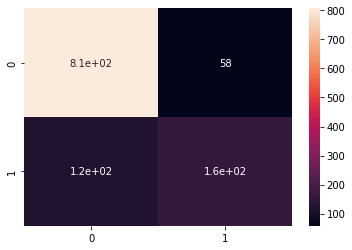

In [ ]:
bert_model.load_weights('checkpoint_bertmodel_MAX.h5')

model_eval_bertbase(bert_model, [test_seq, test_mask], test_y)

##Test Models on Ethos

##Test Model 3 on Ethos - Without training (TL1)

Here you can see the results for Model 3 (TL1) as quoted in the report.


32/32 [==============================] - 2s 35ms/step - loss: 1.5226 - accuracy: 0.6743
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       565
           1       0.65      0.53      0.59       433

    accuracy                           0.67       998
   macro avg       0.67      0.66      0.66       998
weighted avg       0.67      0.67      0.67       998

[[442 123]
 [202 231]]
AxesSubplot(0.125,0.125;0.62x0.755)
Precision: 0.6525, Recall: 0.5335, Specificity: 0.7823


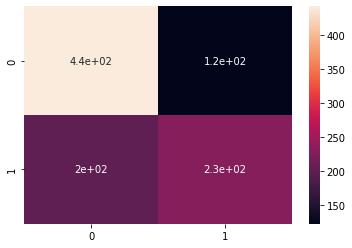

In [ ]:
model_eval_bertbase(bert_model, [all_ids_be, all_mask_be], all_y_be)

##Test Model 3 on Ethos - With training (TL2)

In [ ]:
bertmodel_kfold(all_ids_be, all_mask_be, all_y_be, is_ethos = True)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: U

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
29/29 [==============================] - 117s 2s/step - loss: 1.6305 - accuracy: 0.6526 - val_loss: 1.5664 - val_accuracy: 0.7300
Epoch 2/5
29/29 [==============================] - 8s 267ms/step - loss: 1.4695 - accuracy: 0.7873 - val_loss: 1.4375 - val_accuracy: 0.7400
Epoch 3/5
29/29 [==============================] - 8s 273ms/step - loss: 1.2675 - accuracy: 0.8953 - val_loss: 1.3898 - val_accuracy: 0.7900
Epoch 4/5
29/29 [==============================] - 4s 147ms/step - loss: 1.1093 - accuracy: 0.9588 - val_loss: 1.5335 - val_accuracy: 0.8000
Epoch 5/5
4/4 [==============================] - 1s 36ms/step - loss: 1.3898 - accuracy: 0.7900
Score for fold 1: loss of 1.3898403644561768; accuracy of 78.99999618530273%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: U

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
29/29 [==============================] - 118s 2s/step - loss: 1.6516 - accuracy: 0.6247 - val_loss: 1.5906 - val_accuracy: 0.7400
Epoch 2/5
29/29 [==============================] - 7s 261ms/step - loss: 1.4865 - accuracy: 0.7929 - val_loss: 1.4627 - val_accuracy: 0.7700
Epoch 3/5
29/29 [==============================] - 8s 266ms/step - loss: 1.2677 - accuracy: 0.8998 - val_loss: 1.4569 - val_accuracy: 0.8000
Epoch 4/5
29/29 [==============================] - 4s 144ms/step - loss: 1.0878 - accuracy: 0.9677 - val_loss: 1.4966 - val_accuracy: 0.7800
Epoch 5/5
4/4 [==============================] - 1s 38ms/step - loss: 1.4569 - accuracy: 0.8000
Score for fold 2: loss of 1.4569021463394165; accuracy of 79.99999523162842%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: U

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/5
29/29 [==============================] - 119s 2s/step - loss: 1.6563 - accuracy: 0.5891 - val_loss: 1.5783 - val_accuracy: 0.6600
Epoch 2/5
29/29 [==============================] - 8s 265ms/step - loss: 1.5047 - accuracy: 0.7706 - val_loss: 1.4685 - val_accuracy: 0.7300
Epoch 3/5
29/29 [==============================] - 7s 260ms/step - loss: 1.3204 - accuracy: 0.8786 - val_loss: 1.4131 - val_accuracy: 0.8100
Epoch 4/5
29/29 [==============================] - 4s 145ms/step - loss: 1.1428 - accuracy: 0.9388 - val_loss: 1.4873 - val_accuracy: 0.8100
Epoch 5/5
4/4 [==============================] - 1s 36ms/step - loss: 1.4131 - accuracy: 0.8100
Score for fold 3: loss of 1.4130589962005615; accuracy of 81.00000023841858%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: U

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/5
29/29 [==============================] - 117s 2s/step - loss: 1.6430 - accuracy: 0.6336 - val_loss: 1.5387 - val_accuracy: 0.8100
Epoch 2/5
29/29 [==============================] - 7s 262ms/step - loss: 1.4657 - accuracy: 0.7906 - val_loss: 1.3993 - val_accuracy: 0.8400
Epoch 3/5
29/29 [==============================] - 7s 259ms/step - loss: 1.2590 - accuracy: 0.8964 - val_loss: 1.3513 - val_accuracy: 0.8600
Epoch 4/5
29/29 [==============================] - 4s 144ms/step - loss: 1.0813 - accuracy: 0.9655 - val_loss: 1.4702 - val_accuracy: 0.8500
Epoch 5/5
4/4 [==============================] - 1s 35ms/step - loss: 1.3513 - accuracy: 0.8600
Score for fold 4: loss of 1.351259708404541; accuracy of 85.999995470047%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: U

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/5
29/29 [==============================] - 120s 2s/step - loss: 1.6426 - accuracy: 0.6203 - val_loss: 1.5690 - val_accuracy: 0.7000
Epoch 2/5
29/29 [==============================] - 8s 265ms/step - loss: 1.4857 - accuracy: 0.7728 - val_loss: 1.4998 - val_accuracy: 0.7200
Epoch 3/5
29/29 [==============================] - 8s 264ms/step - loss: 1.3064 - accuracy: 0.8731 - val_loss: 1.3916 - val_accuracy: 0.8200
Epoch 4/5
29/29 [==============================] - 4s 145ms/step - loss: 1.1423 - accuracy: 0.9410 - val_loss: 1.4451 - val_accuracy: 0.8200
Epoch 5/5
4/4 [==============================] - 1s 36ms/step - loss: 1.3916 - accuracy: 0.8200
Score for fold 5: loss of 1.3916096687316895; accuracy of 81.99999928474426%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: U

------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
29/29 [==============================] - 121s 2s/step - loss: 1.6370 - accuracy: 0.6392 - val_loss: 1.5711 - val_accuracy: 0.7300
Epoch 2/5
29/29 [==============================] - 8s 287ms/step - loss: 1.4510 - accuracy: 0.8007 - val_loss: 1.4671 - val_accuracy: 0.7400
Epoch 3/5
29/29 [==============================] - 8s 287ms/step - loss: 1.2525 - accuracy: 0.8964 - val_loss: 1.4256 - val_accuracy: 0.8500
Epoch 4/5
29/29 [==============================] - 4s 154ms/step - loss: 1.1044 - accuracy: 0.9543 - val_loss: 1.4681 - val_accuracy: 0.8100
Epoch 5/5
4/4 [==============================] - 1s 38ms/step - loss: 1.4256 - accuracy: 0.8500
Score for fold 6: loss of 1.4255918264389038; accuracy of 84.99999642372131%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: U

------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/5
29/29 [==============================] - 120s 2s/step - loss: 1.6475 - accuracy: 0.6236 - val_loss: 1.5558 - val_accuracy: 0.7100
Epoch 2/5
29/29 [==============================] - 10s 336ms/step - loss: 1.4701 - accuracy: 0.7784 - val_loss: 1.5392 - val_accuracy: 0.7100
Epoch 3/5
29/29 [==============================] - 8s 264ms/step - loss: 1.2669 - accuracy: 0.8987 - val_loss: 1.4409 - val_accuracy: 0.8100
Epoch 4/5
29/29 [==============================] - 4s 145ms/step - loss: 1.1189 - accuracy: 0.9510 - val_loss: 1.4542 - val_accuracy: 0.7900
Epoch 5/5
4/4 [==============================] - 1s 36ms/step - loss: 1.4409 - accuracy: 0.8100
Score for fold 7: loss of 1.4409222602844238; accuracy of 81.00000023841858%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: U

------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/5
29/29 [==============================] - 120s 2s/step - loss: 1.6745 - accuracy: 0.6013 - val_loss: 1.6241 - val_accuracy: 0.6800
Epoch 2/5
29/29 [==============================] - 8s 272ms/step - loss: 1.5301 - accuracy: 0.7561 - val_loss: 1.4945 - val_accuracy: 0.7700
Epoch 3/5
29/29 [==============================] - 8s 276ms/step - loss: 1.3353 - accuracy: 0.8586 - val_loss: 1.4051 - val_accuracy: 0.7500
Epoch 4/5
29/29 [==============================] - 8s 280ms/step - loss: 1.1581 - accuracy: 0.9310 - val_loss: 1.3799 - val_accuracy: 0.8200
Epoch 5/5
4/4 [==============================] - 1s 38ms/step - loss: 1.3799 - accuracy: 0.8200
Score for fold 8: loss of 1.37991464138031; accuracy of 81.99999928474426%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: U

------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/5
29/29 [==============================] - 119s 2s/step - loss: 1.6463 - accuracy: 0.6485 - val_loss: 1.5788 - val_accuracy: 0.7374
Epoch 2/5
29/29 [==============================] - 8s 277ms/step - loss: 1.4602 - accuracy: 0.8020 - val_loss: 1.5505 - val_accuracy: 0.7172
Epoch 3/5
29/29 [==============================] - 8s 276ms/step - loss: 1.2756 - accuracy: 0.8854 - val_loss: 1.4324 - val_accuracy: 0.7778
Epoch 4/5
29/29 [==============================] - 4s 146ms/step - loss: 1.1077 - accuracy: 0.9533 - val_loss: 1.5063 - val_accuracy: 0.7980
Epoch 5/5
4/4 [==============================] - 1s 37ms/step - loss: 1.4324 - accuracy: 0.7778
Score for fold 9: loss of 1.4324113130569458; accuracy of 77.77777910232544%


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: U

------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/5
29/29 [==============================] - 118s 2s/step - loss: 1.6513 - accuracy: 0.5951 - val_loss: 1.6555 - val_accuracy: 0.5657
Epoch 2/5
29/29 [==============================] - 8s 274ms/step - loss: 1.4953 - accuracy: 0.7764 - val_loss: 1.5325 - val_accuracy: 0.7071
Epoch 3/5
29/29 [==============================] - 8s 274ms/step - loss: 1.3100 - accuracy: 0.8621 - val_loss: 1.4507 - val_accuracy: 0.7576
Epoch 4/5
29/29 [==============================] - 4s 147ms/step - loss: 1.1361 - accuracy: 0.9499 - val_loss: 1.4658 - val_accuracy: 0.7778
Epoch 5/5
4/4 [==============================] - 1s 35ms/step - loss: 1.4507 - accuracy: 0.7576
Score for fold 10: loss of 1.4506856203079224; accuracy of 75.75757503509521%
Weighted F1 Score: 0.8087081992241807, Macro F! Score: 0.8049106839213793
0.8087081992241807


##You can check the macro and weighted F1 score after the 10th fold of cross validation

##This run of the model ouperforms the benchmark as you can see from the scores above.